In [1]:
import matplotlib.pyplot as plt 
import tensorflow as tf 
import pandas as pd 
import numpy as np 

import warnings 
warnings.filterwarnings('ignore') 

from tensorflow import keras 
from keras import layers 
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense 
from tensorflow.keras.layers import Conv2D, MaxPooling2D 
from tensorflow.keras.utils import image_dataset_from_directory 
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img 
from tensorflow.keras.preprocessing import image_dataset_from_directory 

import os 
import matplotlib.image as mpimg


In [2]:
path = 'train'
classes = os.listdir(path) 
classes

['cats', 'dogs']

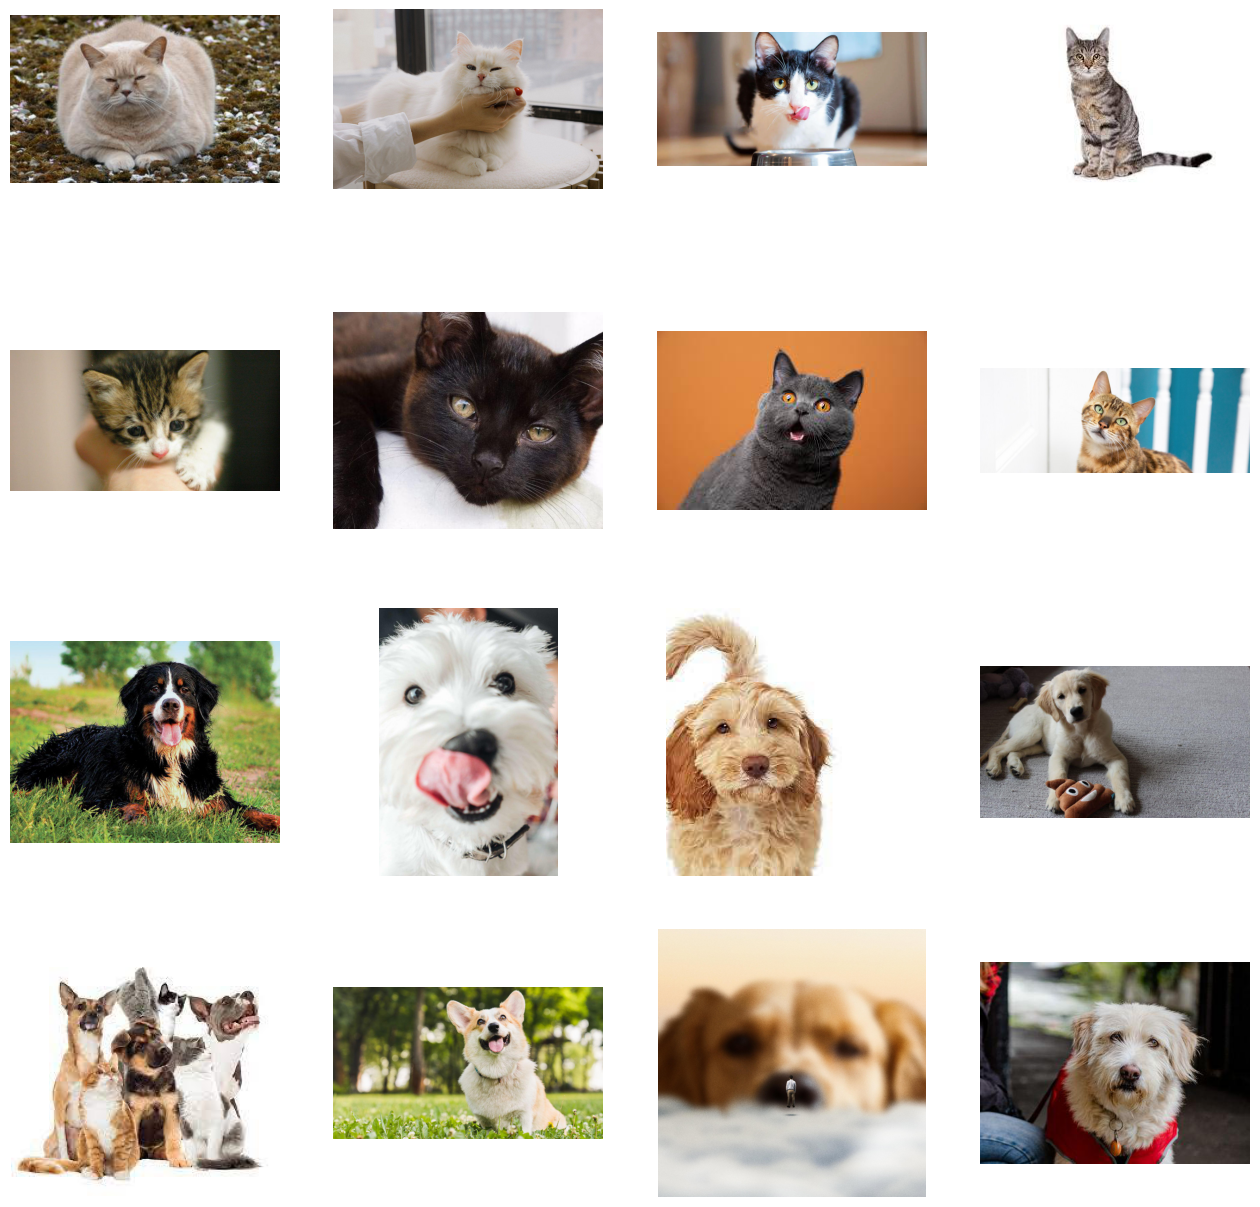

In [3]:
fig = plt.gcf() 
fig.set_size_inches(16, 16) 
  
cat_dir = os.path.join('train/cats') 
dog_dir = os.path.join('train/dogs') 
cat_names = os.listdir(cat_dir) 
dog_names = os.listdir(dog_dir) 
  
pic_index = 210
  
cat_images = [os.path.join(cat_dir, fname) 
              for fname in cat_names[pic_index-8:pic_index]] 
dog_images = [os.path.join(dog_dir, fname) 
              for fname in dog_names[pic_index-8:pic_index]] 
  
for i, img_path in enumerate(cat_images + dog_images): 
    sp = plt.subplot(4, 4, i+1) 
    sp.axis('Off') 
  
    img = mpimg.imread(img_path) 
    plt.imshow(img) 
  
plt.show() 

In [4]:
train = ImageDataGenerator(rescale=1/255)
test = ImageDataGenerator(rescale=1/255)
train_dataset = train.flow_from_directory("train",
                                          target_size=(150,150),
                                          batch_size = 12,
                                          class_mode = 'binary')
                                         
test_dataset = test.flow_from_directory("test",
                                          target_size=(150,150),
                                          batch_size =12,
                                          class_mode = 'binary')

Found 557 images belonging to 2 classes.
Found 140 images belonging to 2 classes.


In [5]:
##model

model = keras.Sequential()

# Convolutional layer and maxpool layer 1
model.add(keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(keras.layers.MaxPool2D(2,2))

# Convolutional layer and maxpool layer 2
model.add(keras.layers.Conv2D(64,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))

# Convolutional layer and maxpool layer 3
model.add(keras.layers.Conv2D(128,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))

# Convolutional layer and maxpool layer 4
model.add(keras.layers.Conv2D(128,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))

# This layer flattens the resulting image array to 1D array
model.add(keras.layers.Flatten())

# Hidden layer with 512 neurons and Rectified Linear Unit activation function 
model.add(keras.layers.Dense(512,activation='relu'))

# Output layer with single neuron which gives 0 for Cat or 1 for Dog 
#Here we use sigmoid activation function which makes our model output to lie between 0 and 1
model.add(keras.layers.Dense(1,activation='sigmoid'))

In [6]:
# Define the data generator with augmentation and validation split
datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

# Create training data generator
train_generator = datagen.flow_from_directory(
    'train',
    target_size=(150, 150),
    batch_size=12,
    class_mode='binary',
    subset='training'
)

# Create validation data generator
validation_generator = datagen.flow_from_directory(
    'train',
    target_size=(150, 150),
    batch_size=12,
    class_mode='binary',
    subset='validation'
)

Found 447 images belonging to 2 classes.
Found 110 images belonging to 2 classes.


In [15]:
#steps_per_epoch = train_imagesize/batch_size
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
history=model.fit(train_generator,
         steps_per_epoch = 37,
         epochs = 10,
         validation_data = validation_generator
       
         )

Epoch 1/10
37/37 [==============================] - 18s 447ms/step - loss: 0.3830 - accuracy: 0.8345 - val_loss: 0.7789 - val_accuracy: 0.6909
Epoch 2/10
37/37 [==============================] - 16s 440ms/step - loss: 0.3147 - accuracy: 0.8529 - val_loss: 0.6050 - val_accuracy: 0.7364
Epoch 3/10
37/37 [==============================] - 16s 447ms/step - loss: 0.2716 - accuracy: 0.8851 - val_loss: 0.8455 - val_accuracy: 0.6091
Epoch 4/10
37/37 [==============================] - 16s 432ms/step - loss: 0.2684 - accuracy: 0.8782 - val_loss: 0.8628 - val_accuracy: 0.6818
Epoch 5/10
37/37 [==============================] - 17s 447ms/step - loss: 0.2327 - accuracy: 0.9172 - val_loss: 1.0780 - val_accuracy: 0.6364
Epoch 6/10
37/37 [==============================] - 16s 427ms/step - loss: 0.2359 - accuracy: 0.9057 - val_loss: 0.7783 - val_accuracy: 0.6909
Epoch 7/10
37/37 [==============================] - 16s 431ms/step - loss: 0.1853 - accuracy: 0.9287 - val_loss: 1.0765 - val_accuracy: 0.7000

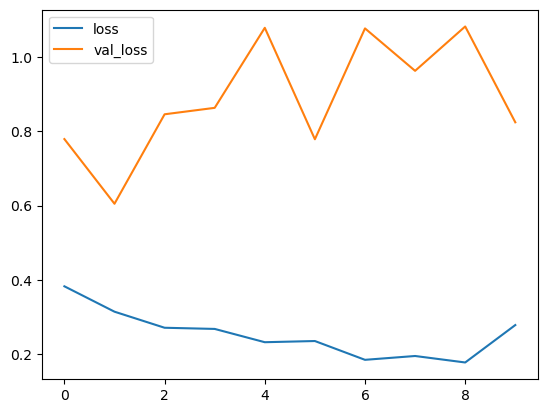

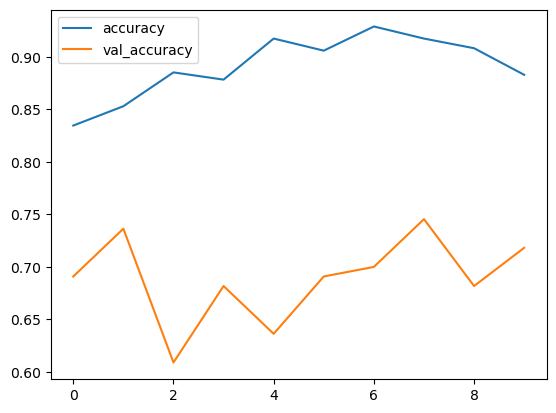

In [16]:
history_df = pd.DataFrame(history.history) 
history_df.loc[:, ['loss', 'val_loss']].plot() 
history_df.loc[:, ['accuracy', 'val_accuracy']].plot() 
plt.show() 

In [17]:
predictions=model.predict(test_dataset)
y_pred = (predictions > 0.38).astype(int).flatten()
y_test = test_dataset.classes

12/12 [==============================] - 2s 170ms/step


In [19]:
# Step 5: Evaluate the model
from sklearn.metrics import accuracy_score, f1_score

accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Step 6: Print the results
print(f'Accuracy: {accuracy:.2f}')
print(f'F1 Score: {f1:.2f}')



Accuracy: 0.40
F1 Score: 0.51
